# Project 2: Business Statistics: Axis Insurance

### Objective: 
Statistical Analysis of Business Data. Explore the dataset and extract insights from the data.

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4. Is the proportion of smokers significantly different across different regions?
5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

In [1]:
#import the neccessary Python libraries
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import   ttest_1samp
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
import statsmodels.api as sm
from scipy.stats import f
from   scipy.stats import chi2_contingency   # For Chi-Sq 
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
import warnings
warnings.filterwarnings('ignore')

### Import the Axis Insurance Dataset

In [2]:
ai = pd.read_csv('AxisInsurance.csv')
ai.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Check the Dataset

In [3]:
ai.describe() #show the 5 point summary of numerical data in the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
ai.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


#### Observations:

1. Mean Age: 39.2
2. Mean BMI: 30.66
3. Mean Ammount of Children: 1.095
4. Mean Charges (medical costs): 13,270.42

In [5]:
#check the size of the dataset
ai.shape

(1338, 7)

Dataset of the sample is large:
1338 entries, 7 datapoints

In [6]:
#check the datatype of datapoints
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Preprocessing

In [7]:
#convert 'object' datatypes to category
ai['sex']=ai.sex.astype('category')
ai['smoker']=ai.smoker.astype('category')
ai['region']=ai.region.astype('category')

In [8]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [9]:
#check to see if the dataset has any missing values
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(ai)
#check indicates there are no missing values in the set

,Total,Percent
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


## Exploratory Data Analysis

In [10]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

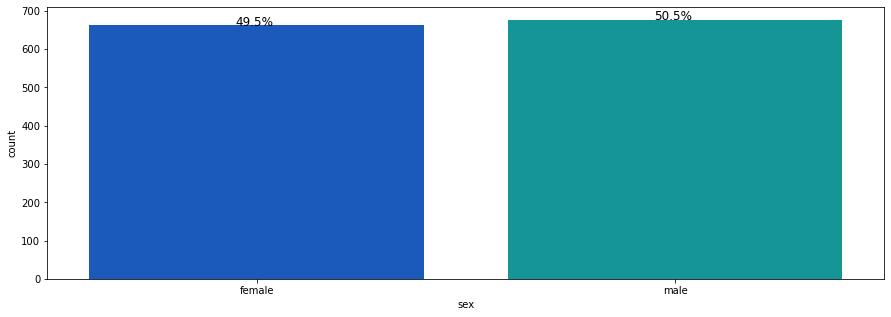

In [11]:
# Find the number of each categorical datapoint

plt.figure(figsize=(15,5))
ax = sns.countplot(ai["sex"],palette='winter')
perc_on_bar(ax,ai["sex"])

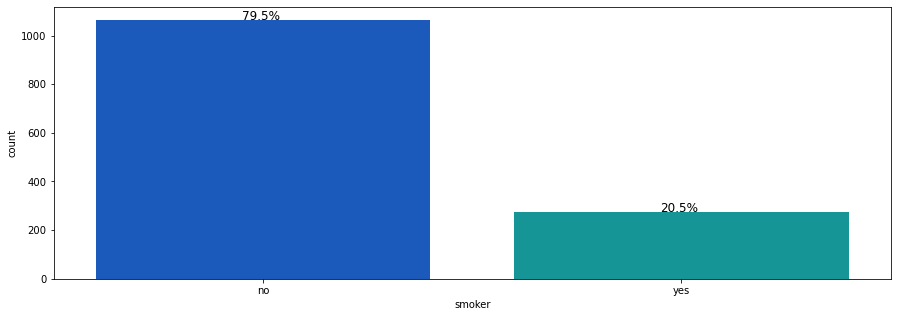

In [12]:
plt.figure(figsize=(15,5))
ax = sns.countplot(ai["smoker"],palette='winter')
perc_on_bar(ax,ai["smoker"])

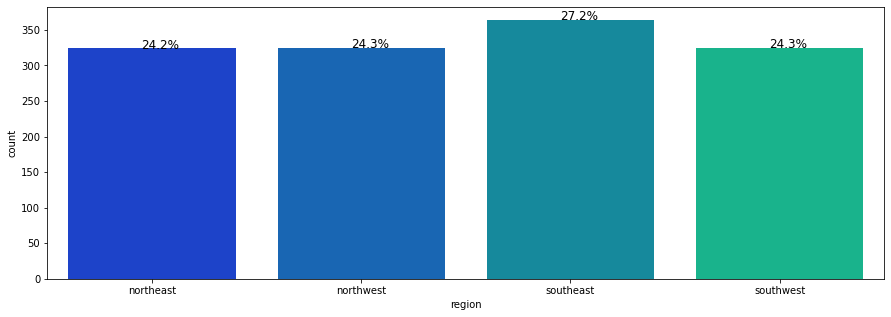

In [13]:
plt.figure(figsize=(15,5))
ax = sns.countplot(ai["region"],palette='winter')
perc_on_bar(ax,ai["region"])

In [14]:
# define a function to make combination boxplot with histograms to better visualize the data
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


### Age Info

Minimum age:  18
Maximum age:  64
Average age:  39.20702541106129


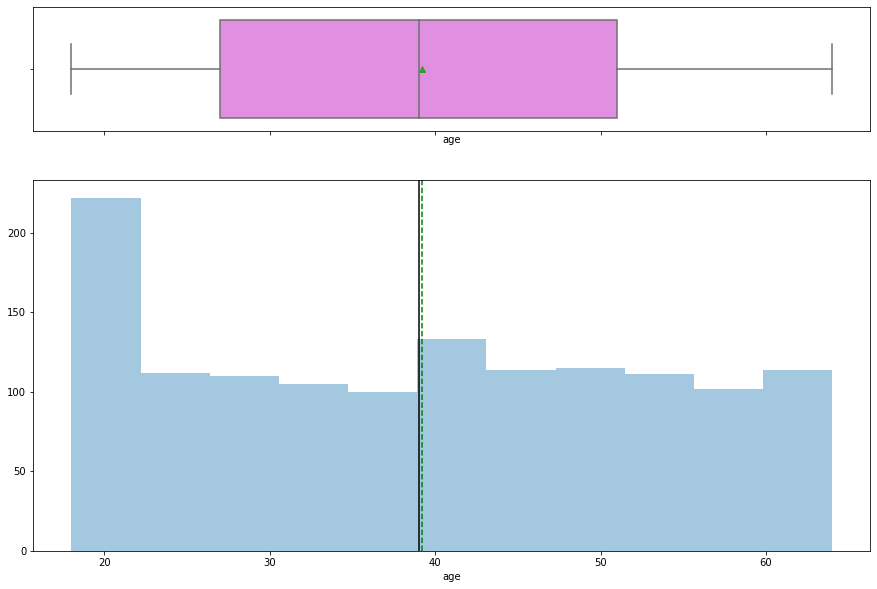

In [15]:
histogram_boxplot(ai["age"])
print('Minimum age: ',np.min(ai['age']))
print('Maximum age: ',np.max(ai['age']))
print('Average age: ',np.mean(ai['age']))

* Age ranges from 18-64
* Several people in the 18-22 demographic
* average and mean age are very similar around 39
* wide range, but pretty evenly distributed with no apparent outliers

### BMI info

Minimum BMI:  15.96
Maximum BMI:  53.13
Average BMI:  30.663396860986538


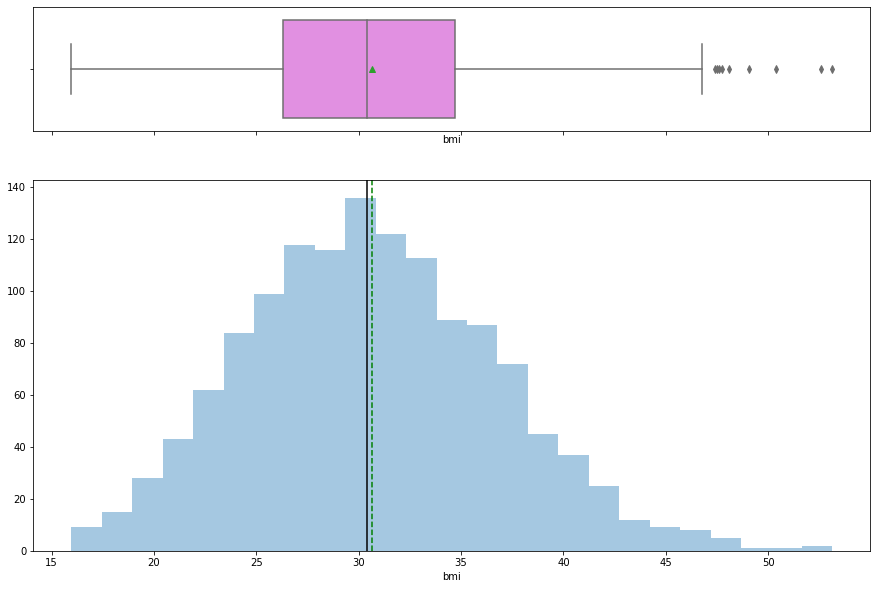

In [16]:
histogram_boxplot(ai["bmi"])
print('Minimum BMI: ',np.min(ai['bmi']))
print('Maximum BMI: ',np.max(ai['bmi']))
print('Average BMI: ',np.mean(ai['bmi']))

* BMI histogram follows a nearly normal bell curve with mean and median around 30.5
* A few outliers at the top end of the data


### Children Info

Minimum Children:  0
Maximum Children:  5
Average Children:  1.0949177877429


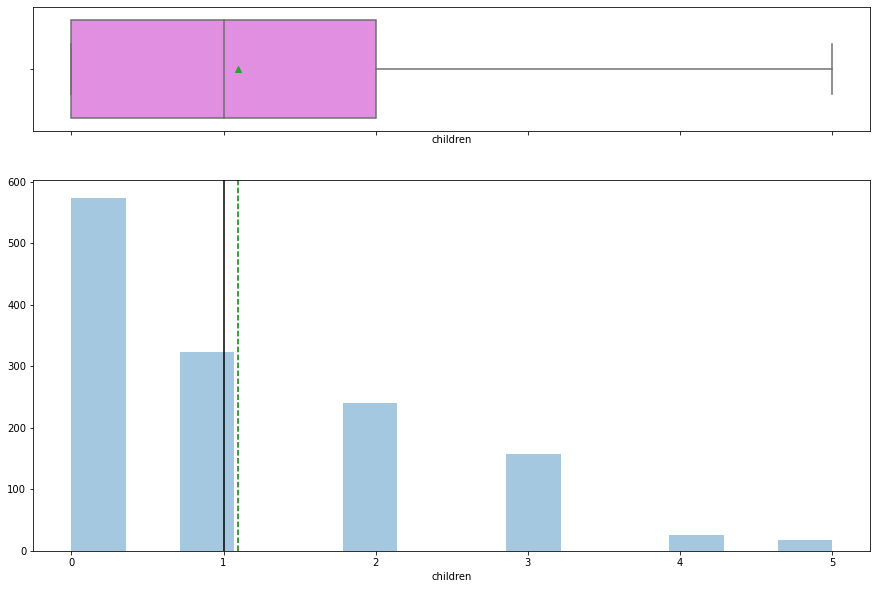

In [17]:
histogram_boxplot(ai["children"])
print('Minimum Children: ',np.min(ai['children']))
print('Maximum Children: ',np.max(ai['children']))
print('Average Children: ',np.mean(ai['children']))

### Charges Info

Minimum medical charges:  1121.8739
Maximum medical charges:  63770.42801
Average medical charges:  13270.422265141257


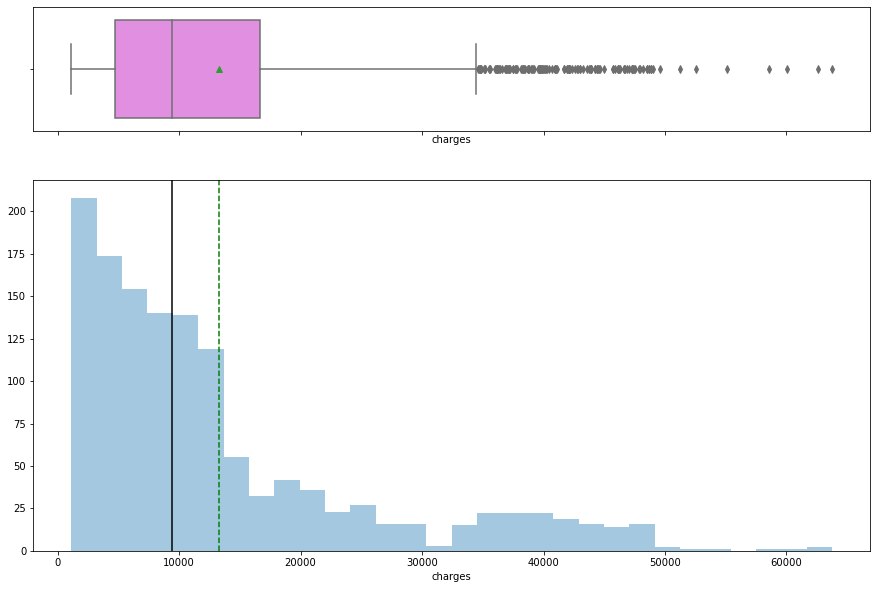

In [18]:
histogram_boxplot(ai["charges"])

print('Minimum medical charges: ',np.min(ai['charges']))
print('Maximum medical charges: ',np.max(ai['charges']))
print('Average medical charges: ',np.mean(ai['charges']))

* Medical charges have a wide left skewed range from around around \\$1,100 up to nearly \\$64,000
* Most fall under \\$10,000 with a median of \\$9,382 but a mean value much higher at \\$13,270
* Several outlier values in the higher values

## Bivariate Analysis

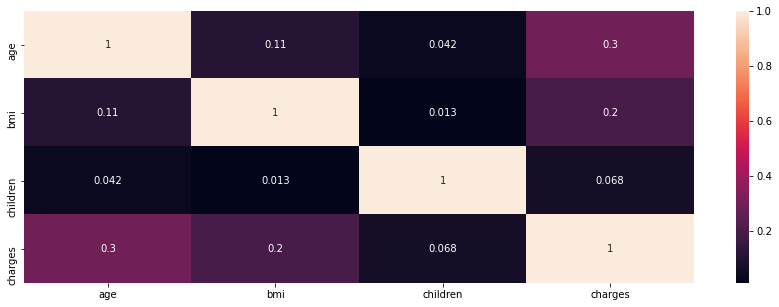

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(ai.corr(),annot=True)
plt.show()

* Age does not look to be highly correlated with any of the data points
* BMI does not look to be highly correlated with any of the data points
* Children does not look to be highly correlated with any of the data points
* Charges does not look to be highly correlated with any of the data points

#### None of the numerical values appear strongly correlated based on this heat map

### Gender vs. BMI

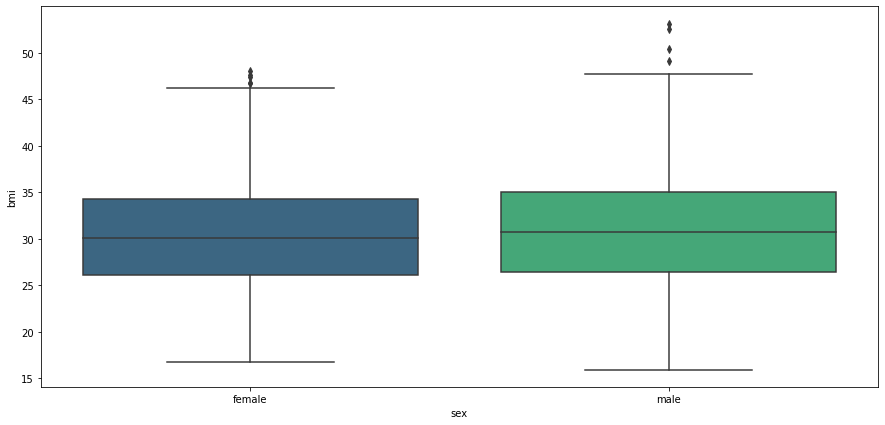

Minimum BMI:  15.96
Maximum BMI:  53.13
Average BMI:  30.663396860986538
male      676
female    662
Name: sex, dtype: int64


In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(ai["sex"], ai["bmi"],palette="viridis")
plt.show()
print('Minimum BMI: ',np.min(ai['bmi']))
print('Maximum BMI: ',np.max(ai['bmi']))
print('Average BMI: ',np.mean(ai['bmi']))

print (ai['sex'].value_counts())



* Box plots show the male mean BMI is slightly higher than females
* Males have outlier values quite a bit higher than females

### Age vs Charges scatterplot

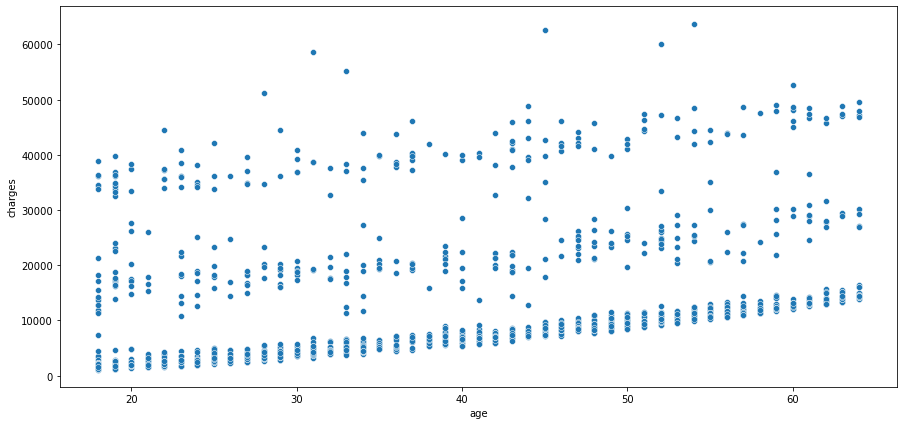

In [21]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='age', y='charges', data=ai) # scatter plot 
plt.show()

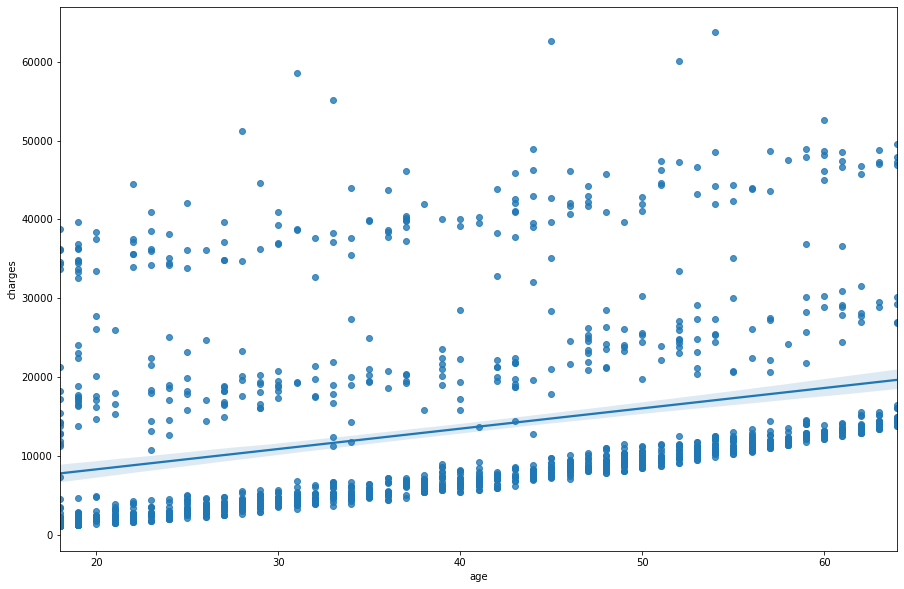

In [22]:
figure = plt.figure(figsize=(15,10))

ax = sns.regplot(x='age',y='charges', data=ai ) # regression plot - scatter plot with a regression line
# This plots a scatterplot with a regression line showing a positive correlation between age and charges

* As expected as age increases there appears to be a correlation with medical charges

### Sex vs Medical Charges

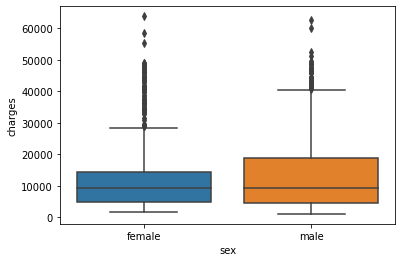

In [23]:
sns.boxplot(ai['sex'], ai['charges']);

* The mean medical charges separated by sex do not appear to be very different

## A pairplot allows us to further visualize the relationships of numerical variables

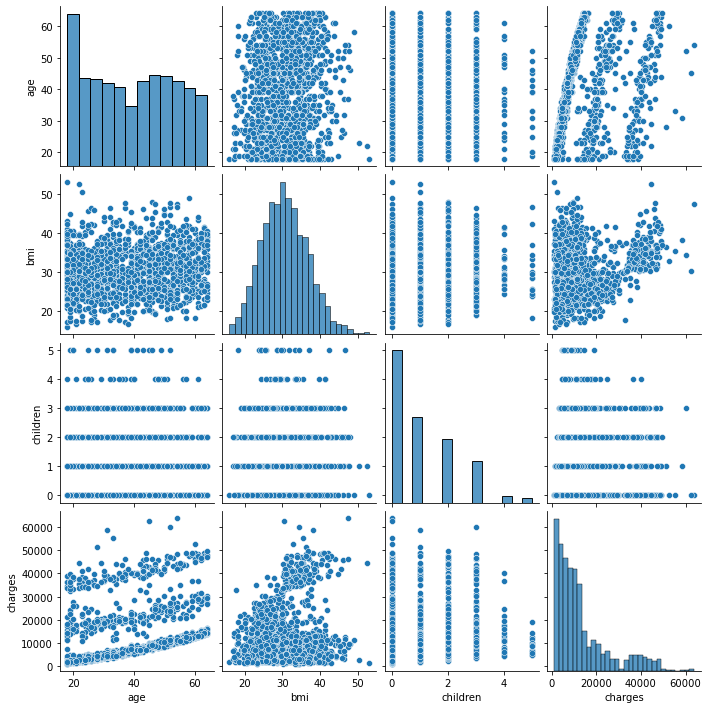

In [24]:
sns.pairplot(data = ai)
plt.show()

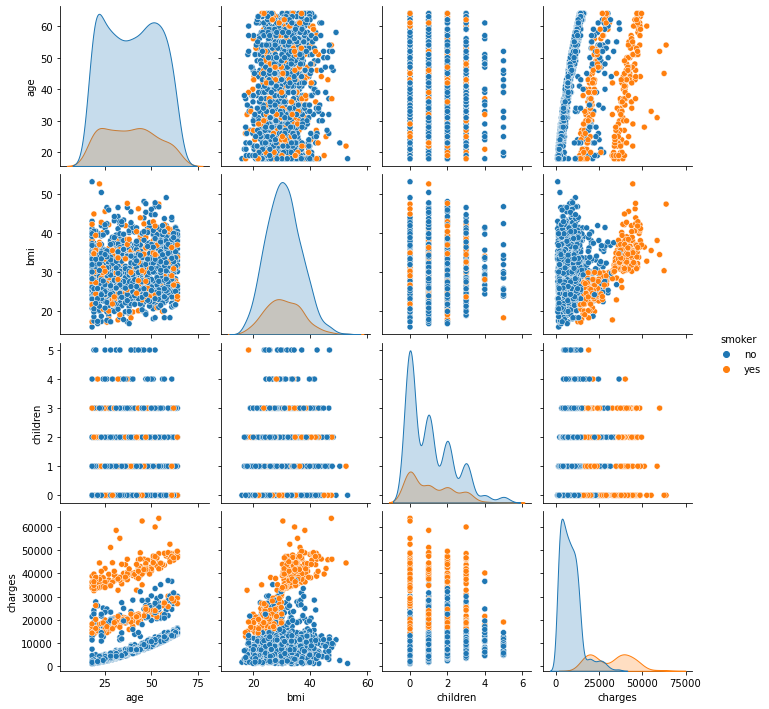

In [25]:
sns.pairplot(data = ai, hue = 'smoker')
plt.show()

#### Pair Plot with smoker hue
    * can see smokers look be lower in age, have lower bmi, less children and higher medical charges

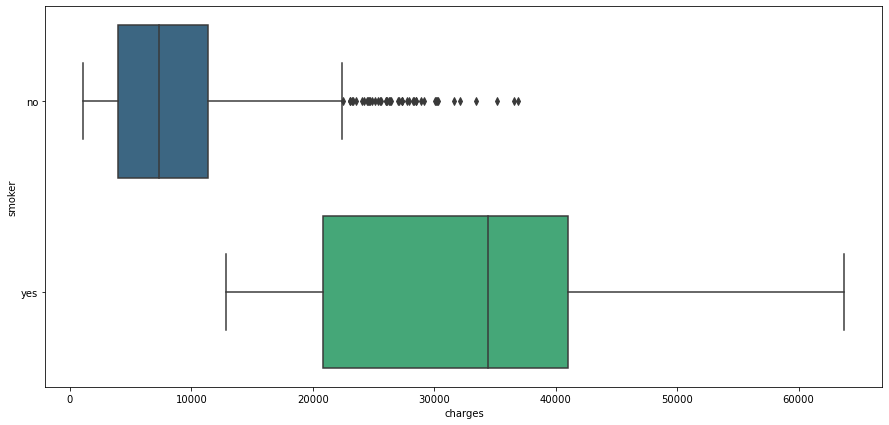

Minimum charges:  1121.8739
Maximum charges:  63770.42801
Average charges:  13270.422265141257


In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(ai["charges"], ai["smoker"],palette="viridis")
plt.show()
print('Minimum charges: ',np.min(ai['charges']))
print('Maximum charges: ',np.max(ai['charges']))
print('Average charges: ',np.mean(ai['charges']))


### Smokers appear to have much higher average medical bills vs. non-smokers

In [27]:
ai[ai["sex"]=="female"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,662.000000,662,662.000000,662.000000,662,662,662.000000
unique,NaN,1,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,662,NaN,NaN,547,175,NaN
mean,39.503021,NaN,30.377749,1.074018,NaN,NaN,12569.578844
std,14.054223,NaN,6.046023,1.192115,NaN,NaN,11128.703801
min,18.000000,NaN,16.815000,0.000000,NaN,NaN,1607.510100
25%,27.000000,NaN,26.125000,0.000000,NaN,NaN,4885.158700
50%,40.000000,NaN,30.107500,1.000000,NaN,NaN,9412.962500
75%,51.750000,NaN,34.313750,2.000000,NaN,NaN,14454.691825


In [28]:
ai[ai["sex"]=="male"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,676.000000,676,676.000000,676.000000,676,676,676.000000
unique,NaN,1,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,517,189,NaN
mean,38.917160,NaN,30.943129,1.115385,NaN,NaN,13956.751178
std,14.050141,NaN,6.140435,1.218986,NaN,NaN,12971.025915
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.410000,0.000000,NaN,NaN,4619.134000
50%,39.000000,NaN,30.687500,1.000000,NaN,NaN,9369.615750
75%,51.000000,NaN,34.992500,2.000000,NaN,NaN,18989.590250


#### Female mean BMI: 30.377749

#### Male mean BMI: 30.943129
    
#### Total mean BMI: 30.663397


{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}

## Question 1: Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 

In [29]:
non_charge = ai[ai['smoker'] == 'no'].charges.mean()  # mean non-smoker medical charges
smoker_charge = ai[ai['smoker'] == 'yes'].charges.mean() # mean smoker medical charges
n_non = ai.smoker.value_counts()['no'] # number of non-smokers in the data
n_smokers = ai.smoker.value_counts()['yes'] #number of smokers in the data

In [30]:
n_non

1064

In [31]:
n_smokers

274

In [32]:
print(non_charge)

8434.268297856199


In [33]:
print(smoker_charge)

32050.23183153285


### The average charges for non-smokers appear much lower than for smokers 
#### 8434.27 vs. 32,050.23 -- almost 4 times as high

#### Form Hypotheses

Ho: Charges for non-smokers = charges for smokers

Ha: Charges for non-smokers < charges for smokers

In [34]:
ai[ai["smoker"]=="yes"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,274.000000,274,274.000000,274.000000,274,274,274.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,male,NaN,NaN,yes,southeast,NaN
freq,NaN,159,NaN,NaN,274,91,NaN
mean,38.514599,NaN,30.708449,1.113139,NaN,NaN,32050.231832
std,13.923186,NaN,6.318644,1.157066,NaN,NaN,11541.547176
min,18.000000,NaN,17.195000,0.000000,NaN,NaN,12829.455100
25%,27.000000,NaN,26.083750,0.000000,NaN,NaN,20826.244213
50%,38.000000,NaN,30.447500,1.000000,NaN,NaN,34456.348450
75%,49.000000,NaN,35.200000,2.000000,NaN,NaN,41019.207275


In [35]:
ai[ai["smoker"]=="no"].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1064.000000,1064,1064.000000,1064.000000,1064,1064,1064.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,547,NaN,NaN,1064,273,NaN
mean,39.385338,NaN,30.651795,1.090226,NaN,NaN,8434.268298
std,14.083410,NaN,6.043111,1.218136,NaN,NaN,5993.781819
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.750000,NaN,26.315000,0.000000,NaN,NaN,3986.438700
50%,40.000000,NaN,30.352500,1.000000,NaN,NaN,7345.405300
75%,52.000000,NaN,34.430000,2.000000,NaN,NaN,11362.887050


In [36]:
x1 = ai[ai["smoker"]=="yes"]
x2 = ai[ai["smoker"]=="no"]

In [37]:
t_statistic, p_value = ttest_1samp(ai['charges'], 8434)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))


One sample t test 
t statistic: 14.6085705559254 p value: 5.92457628889715e-45 


In [38]:
medcharges = ai['charges']

In [39]:
print(medcharges)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [40]:
#T statistic for charges using mean of smokers
t_statistic, p_value = ttest_1samp(ai['charges'], 32050.231832)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -56.72502483119844 p value: 0.0 


In [41]:
#T statistic for charges using mean of non-smokers
t_statistic, p_value = ttest_1samp(ai['charges'], 8434.268298)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: 14.60776015310113 p value: 5.985653602494951e-45 


In [42]:
#T statistic for charges using overall mean of charges - achieves a p-value of basically 1
t_statistic, p_value = ttest_1samp(ai['charges'], 13270.422265)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: 4.26672142700163e-10 p value: 0.9999999996596285 


### Observations

* Both of the 2 groups, smokers and non-smokers produce results outside the central distribution of the mean for
  medical charges
* Over 71 standard deviations separate the smoker vs. non-smoker mean distributions suggesting there is very little or no overlap
* We can reject the null hypothesis, the mean charges for smokers are significantly higher than that of non-smokers

### Solution: 
Reject the null hypothesis, Charges for non-smokers < Charges for smokers

{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}

## Question 2: Is the BMI significantly different between genders in the sample?

Null Hypothesis:
    
    Ho: Female BMI = Male BMI
    
Alternative Hypothesis:
    
    Ha: Female BMI ≠ Male BMI

In [43]:
male = ai["sex"]=="male"

mbmi = male, ai['bmi']

mbmi

np.mean(mbmi)




15.58431427503737

In [44]:
female_df = ai[ai['sex'] == 'female']
male_df = ai[ai['sex'] == 'male']

print (female_df)
print (male_df)

      age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
7      37  female  27.74         3     no  northwest   7281.50560
9      60  female  25.84         0     no  northwest  28923.13692
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[662 rows x 7 columns]
      age   sex     bmi  children smoker     region      charges
1      18  male  33.770         1     no  southeast   1725.55230
2      28  male  33.000         3     no  southeast   

In [45]:

print (female_df, ai['bmi'])
print (male_df, ai['bmi'])

      age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
5      31  female  25.74         0     no  southeast   3756.62160
6      46  female  33.44         1     no  southeast   8240.58960
7      37  female  27.74         3     no  northwest   7281.50560
9      60  female  25.84         0     no  northwest  28923.13692
...   ...     ...    ...       ...    ...        ...          ...
1332   52  female  44.70         3     no  southwest  11411.68500
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500
1337   61  female  29.07         0    yes  northwest  29141.36030

[662 rows x 7 columns] 0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 

In [46]:
print (ai['bmi'])

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64


### Find the mean bmi for each gender

In [47]:
ai.groupby(by='sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

In [48]:
#t test based on the sample mean
t_statistic, p_value = ttest_1samp(ai['bmi'], 30.663397)
print(t_statistic,p_value)

-8.338427389514144e-07 0.9999993348141444


In [49]:
#t test based on the female mean
t_statistic, p_value = ttest_1samp(ai['bmi'], 30.377749)
print(t_statistic,p_value)

1.7133981809182044 0.08687112431015984


In [50]:
#t test based on the male mean
t_statistic, p_value = ttest_1samp(ai['bmi'],  30.943129)
print(t_statistic,p_value)

-1.6779139758815755 0.09359760658963238


In [51]:
fem_bmi = ai[ai['sex'] == 'female'].bmi.mean()  # mean female bmi
male_bmi = ai[ai['sex'] == 'male'].bmi.mean() # mean male bmi
n_females = ai.sex.value_counts()[1] # number of females in the data
n_males = ai.sex.value_counts()[0] #number of males in the data

In [52]:
print(n_females)

662


In [53]:
print(n_males)

676


In [54]:
print(fem_bmi)

30.377749244713023


In [55]:
print(male_bmi)

30.943128698224832


In [56]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([fem_bmi, male_bmi] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.992 the difference is not significant. aka |We fail to reject the null|


### The proportional Z test indicates the mean bmi separated by sex is not significantly different, thus we fail to reject the null hypothesis

{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}

## Question 3: Is the proportion of smokers significantly different across different regions?

    H0: Proportions of smokers is not significantly different across regions
    
    H1: Proportions of smokers is significantly different across regions

### Make a countplot to see the percentage of smokers and non-smokers sepated by region

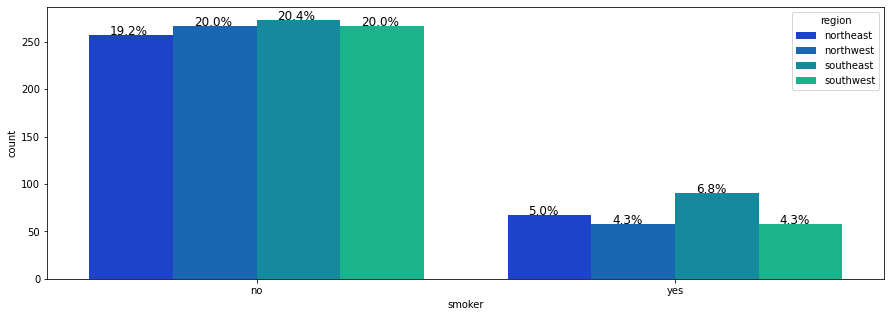

In [57]:
plt.figure(figsize=(15,5))
ax = sns.countplot(ai["smoker"], hue = ai['region'], palette='winter')
perc_on_bar(ax,ai["region"])

In [58]:
ai.groupby(by='region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


North East  smokers = .05*1338 = 67
North West smokers = .043*1338 = 58
South East smokers = .068*1338 = 91
South West smokers = .043*1338 = 58

Total Smokers = 274

northeast	324
northwest	325
southeast	364
southwest	325

### Calculate the percentage of smokers within each region

In [59]:
print ('NE percent smokers: ', 67/324)
print ('NW percent smokers: ', 58/325)
print ('SE percent smokers: ', 91/364)
print ('SW percent smokers: ', 58/325)

print ('Overall percent smokers: ', 274/1338)

NE percent smokers:  0.20679012345679013
NW percent smokers:  0.17846153846153845
SE percent smokers:  0.25
SW percent smokers:  0.17846153846153845
Overall percent smokers:  0.20478325859491778


* can see the percentage ranges from around 18-25% within specific regions with the sample mean of about 20.5%

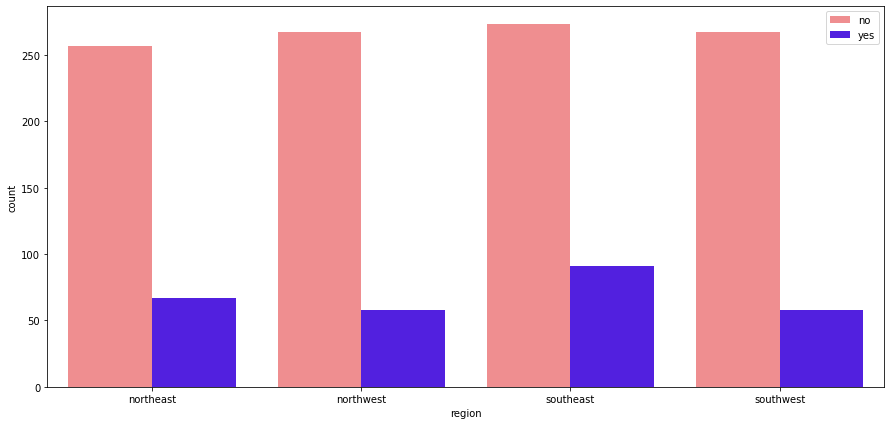

In [60]:
plt.figure(figsize=(15,7))
sns.countplot(ai["region"],hue=(ai["smoker"]),palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

### Make a crosstab table of smokers and non-smokers separated by region

In [61]:
smoker_region_crosstab = pd.crosstab(ai['smoker'], 
                            ai['region'],  
                               margins = False) 
print(smoker_region_crosstab) 

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


### Since we want to determine if the proportions of smokers vary significantly by region we will use a Chi-Square contigency test to determine the significance of the difference of proportions

In [62]:
stats.chi2_contingency(smoker_region_crosstab)

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

In [63]:
chi2, pval, dof, exp_freq = chi2_contingency(smoker_region_crosstab, correction = False)

In [64]:
pval

0.06171954839170547

### With 95% confidence and a p-value of .0617>.05 we can say the proportions of smokers by regions are not significantly different
## Solution: We fail to reject the null hypothesis, did not find proportions of smokers in regions significantly different

{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}{}

## Question 4: Is the mean BMI of women with no children, one child, and two children the same?

H0: Mean BMI for women with 0,1,2 children does not differ significantly

H1: Mean BMI for women with 0,1,2 children does differ significantly

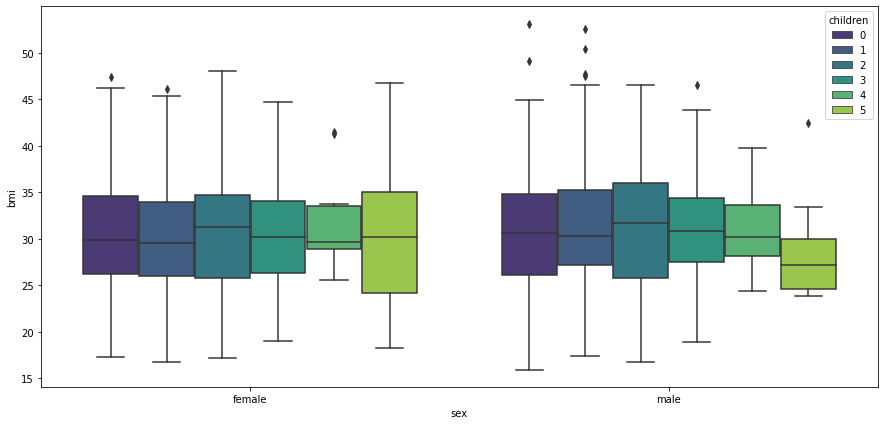

In [65]:
# a box plot of BMI separated by gender and divided by child count
plt.figure(figsize=(15,7))
sns.boxplot(ai["sex"], ai["bmi"], hue= ai["children"], palette="viridis")
plt.show()

* Just eyballing the box plots there doesn't appear to be a large difference in mean BMI for 0,1, or 2 children for women

In [66]:
ai[ai["children"]==0].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,574.000000,574,574.000000,574.0,574,574,574.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,289,NaN,NaN,459,157,NaN
mean,38.444251,NaN,30.550296,0.0,NaN,NaN,12365.975602
std,16.436228,NaN,6.039106,0.0,NaN,NaN,12023.293942
min,18.000000,NaN,15.960000,0.0,NaN,NaN,1121.873900
25%,22.000000,NaN,26.143750,0.0,NaN,NaN,2734.421150
50%,36.000000,NaN,30.302500,0.0,NaN,NaN,9856.951900
75%,55.000000,NaN,34.746250,0.0,NaN,NaN,14440.123825


In [67]:
ai[ai["children"]==1].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,324.000000,324,324.000000,324.0,324,324,324.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,166,NaN,NaN,263,95,NaN
mean,39.453704,NaN,30.623148,1.0,NaN,NaN,12731.171832
std,12.067445,NaN,6.101435,0.0,NaN,NaN,11823.631451
min,18.000000,NaN,16.815000,1.0,NaN,NaN,1711.026800
25%,30.000000,NaN,26.615000,1.0,NaN,NaN,4791.643175
50%,40.000000,NaN,30.015000,1.0,NaN,NaN,8483.870150
75%,49.000000,NaN,34.237500,1.0,NaN,NaN,15632.052050


In [68]:
ai[ai["children"]==2].describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,240.000000,240,240.000000,240.0,240,240,240.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,121,NaN,NaN,185,66,NaN
mean,39.445833,NaN,30.978104,2.0,NaN,NaN,15073.563734
std,11.588715,NaN,6.509644,0.0,NaN,NaN,12891.368347
min,18.000000,NaN,16.815000,2.0,NaN,NaN,2304.002200
25%,30.000000,NaN,25.786250,2.0,NaN,NaN,6284.939438
50%,40.000000,NaN,31.640000,2.0,NaN,NaN,9264.979150
75%,48.000000,NaN,35.357500,2.0,NaN,NaN,20379.276748


In [69]:
fem0cbmi = ai[(ai['sex'] == 'female') & (ai['children'] == 0) & (ai['bmi'])]

In [70]:
fem0cbmi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
13,56,female,39.82,0,no,southeast,11090.71780


In [71]:
fem1cbmi = ai[(ai['sex'] == 'female') & (ai['children'] == 1) & (ai['bmi'])]

In [72]:
fem1cbmi.head()

,age,sex,bmi,children,smoker,region,charges
6,46,female,33.44,1,no,southeast,8240.5896
16,52,female,30.78,1,no,northeast,10797.3362
21,30,female,32.40,1,no,southwest,4149.7360
23,34,female,31.92,1,yes,northeast,37701.8768
58,53,female,22.88,1,yes,southeast,23244.7902


In [73]:
fem2cbmi = ai[(ai['sex'] == 'female') & (ai['children'] == 2) & (ai['bmi'])]

In [74]:
fem2cbmi.head()

,age,sex,bmi,children,smoker,region,charges
27,55,female,32.775,2,no,northwest,12268.63225
41,31,female,36.630,2,no,southeast,4949.75870
43,37,female,30.800,2,no,southeast,6313.75900
46,18,female,38.665,2,no,northeast,3393.35635
51,21,female,33.630,2,no,northwest,3579.82870


In [75]:
fem0cbmi.describe()

,age,bmi,children,charges
count,289.000000,289.000000,289.0,289.000000
mean,38.346021,30.361522,0.0,11905.714276
std,16.358335,5.966934,0.0,11471.881191
min,18.000000,17.290000,0.0,1607.510100
25%,22.000000,26.200000,0.0,3171.614900
50%,36.000000,29.925000,0.0,9541.695550
75%,56.000000,34.600000,0.0,14133.037750
max,64.000000,47.410000,0.0,63770.428010


In [76]:
fem1cbmi.describe()

,age,bmi,children,charges
count,158.000000,158.000000,158.0,158.000000
mean,39.506329,30.052658,1.0,12161.360414
std,11.428954,5.786831,0.0,11071.976512
min,18.000000,16.815000,1.0,2201.097100
25%,30.000000,25.982500,1.0,5046.491400
50%,41.000000,29.567500,1.0,8232.868150
75%,48.000000,33.942500,1.0,14287.374210
max,64.000000,46.090000,1.0,58571.074480


In [77]:
fem2cbmi.describe()

,age,bmi,children,charges
count,119.000000,119.00000,119.0,119.000000
mean,40.512605,30.64979,2.0,13941.317326
std,12.248740,6.62820,0.0,11419.324548
min,18.000000,17.19500,2.0,2801.258800
25%,31.000000,25.77000,2.0,6358.025175
50%,42.000000,31.30000,2.0,10107.220600
75%,50.500000,34.75000,2.0,15649.704400
max,64.000000,48.07000,2.0,47305.305000


### Average Female BMI

#### 0 Children : 30.361522
#### 1 Children : 30.052658
#### 2 Children : 30.64979

### Extract the data we need from the main dataset and make a new dataset with just the variables we want to analyze
* Female
* 2 children or less

In [78]:
fem02cbmi = ai[(ai['sex'] == 'female') & (ai['children'] <= 2) & (ai['bmi'])]

In [79]:
fem02cbmi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [80]:
fem02cbmi.describe()

,age,bmi,children,charges
count,566.000000,566.000000,566.000000,566.000000
mean,39.125442,30.335910,0.699647,12405.058539
std,14.310470,6.055825,0.794828,11358.829450
min,18.000000,16.815000,0.000000,1607.510100
25%,26.000000,26.053750,0.000000,4371.572437
50%,39.500000,29.972500,0.000000,9041.613500
75%,51.000000,34.437500,1.000000,14399.313138
max,64.000000,48.070000,2.000000,63770.428010


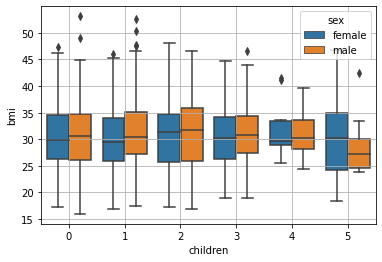

In [81]:
sns.boxplot(x="children", y="bmi", hue="sex", data=ai)
plt.grid()
plt.show()

In [82]:
formula = 'bmi ~ C(sex) + C(children)'
model = ols(formula, fem02cbmi).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(sex)         1.0     20.228865  20.228865  0.550301  0.458504
C(children)    2.0     24.843770  12.421885  0.337922  0.713395
Residual     563.0  20695.661583  36.759612       NaN       NaN


#### Run an ANOVA formula to determine if there is a significant difference in mean BMI for women with 0, 1, or 2 children

In [83]:
formula = 'bmi ~ C(children)'
model = ols(formula, fem02cbmi).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    2.0     24.590123  12.295062  0.334472  0.715858
Residual     563.0  20695.661583  36.759612       NaN       NaN


### P value = 0.715858
P > .05

### Solution: This suggests we cannot reject the null hypothesis - there does not appear to be a significant difference in mean BMI for females with 0, 1, or 2 children